<a href="https://colab.research.google.com/github/bagavijit418/NLP_ALGO_POC/blob/master/Practice_Word_Embedding_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><u><H1>Word Embedding Visualization</H1></u></center>

In [0]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [0]:
sentences = [['this', 'is', 'a', 'very', 'good', 'NLP', 'course'],
            ['this', 'is', 'a', 'NLP', 'course'],
            ['Word2Vec', 'NLP', 'text'],
            ['word', 'embedding', 'NLP'],
            ['NLP', 'course', 'Word2Vec', 'embedding']]

In [0]:
model = Word2Vec(sentences, min_count=1)

In [0]:
print(model)

Word2Vec(vocab=11, size=100, alpha=0.025)


In [0]:
words = list(model.wv.vocab)
print(words)

['this', 'is', 'a', 'very', 'good', 'NLP', 'course', 'Word2Vec', 'text', 'word', 'embedding']


In [0]:
print(model['course'])
print(len(model['course']))

[-0.00072203 -0.00022943  0.00091421 -0.00249466  0.00450027  0.00085178
 -0.00416227 -0.00361134  0.00126013  0.00377714 -0.00451212 -0.00338666
  0.00325522 -0.00150879 -0.00151569 -0.00219119 -0.0001539   0.0039786
  0.00225634 -0.00410277  0.00298822  0.00354199 -0.00319824  0.00497288
  0.00453323 -0.00110766 -0.00467746 -0.00200687 -0.00356016 -0.00421959
 -0.00121702  0.00429911 -0.00097834  0.00299669  0.00250366 -0.00139625
 -0.00226799  0.00128403 -0.00022084  0.0015808  -0.00302883 -0.00170165
 -0.00425392  0.0032544   0.00412443  0.00226191  0.00120906  0.00166014
 -0.00168444  0.00210907  0.00099218 -0.00440963 -0.00243403 -0.00398688
  0.0047249  -0.00470734  0.00266298 -0.00415373  0.00406632  0.00260468
 -0.00151565  0.00270928  0.00161311  0.00238724  0.00105494  0.00449403
  0.0030712  -0.00392378 -0.00235294 -0.00314616  0.0025978   0.00317352
  0.00380143  0.00153437 -0.00313636 -0.00444937 -0.00394902  0.00155255
  0.00084791  0.00126084  0.00129853 -0.00410808 -0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
model.save('word_embeddings_model.bin')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
new_model = Word2Vec.load('word_embeddings_model.bin')
print(new_model)

Word2Vec(vocab=11, size=100, alpha=0.025)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## Visualizing Word Embeddings:

In [0]:
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
X.shape

(11, 100)

In [0]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)

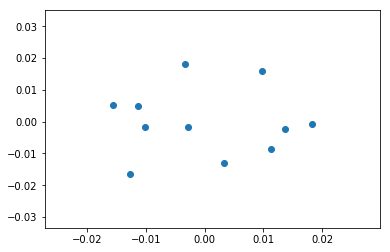

In [0]:
plt.scatter(result[:, 0], result[:, 1])

In [0]:
result

array([[-0.00340887,  0.0180916 ],
       [-0.00286914, -0.00177143],
       [ 0.00978112,  0.01606301],
       [-0.01571727,  0.00539172],
       [-0.01270005, -0.01647059],
       [ 0.01131807, -0.00868518],
       [ 0.01821805, -0.0006509 ],
       [-0.01016435, -0.00161649],
       [-0.01139659,  0.00493227],
       [ 0.01366539, -0.00240447],
       [ 0.00327363, -0.01287953]], dtype=float32)

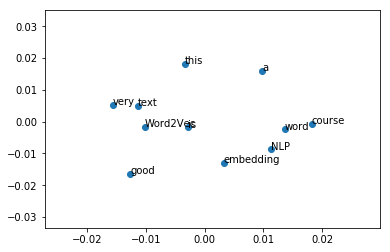

In [0]:
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Load Google's Word2Vec Embedding -- Do not run the below as will need 3.5 GB space to download the google model

In [0]:
import gzip
import urllib.request

baseURL = "https://s3.amazonaws.com/dl4j-distribution/"
filename = "GoogleNews-vectors-negative300.bin.gz"
outFilePath = filename[:-3]

response = urllib.request.urlopen(baseURL + filename)
with open(outFilePath, 'wb') as outfile:
    outfile.write(gzip.decompress(response.read()))

In [0]:
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [0]:
#queen = (king - man) + woman
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

## Reference:

GoogleNews-vectors: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit